# 코로나 관련 정보 긁어오기 위한 밑작업
 - soup import하기
 - selenium import하기

In [3]:
import time
from bs4 import BeautifulSoup
#matplotlib 한글
import matplotlib
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = 'C:/Windows/Fonts/malgun.ttf').get_name()
matplotlib.rc('font', family = font_name)

import matplotlib.pyplot as plt
%matplotlib inline
'''
import selenium as sns
import urllib.request
import urllib.parse
import requests
#from selenium import webdriver
#from selenium.webdriver.common.by import By
#from selenium.webdriver.support.ui import WebDriverWait
#from selenium.webdriver.support import expected_conditions as EC
'''
import pandas as pd
import numpy as np

# 1번문제 데이터 가져오기
 - https://www.kaggle.com/therealcyberlord/coronavirus-covid-19-visualization-prediction/notebook

In [5]:
#확진자 데이터
print("해당 웹 페이지에서 데이터 불러오기 ")

confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
confirmed_df

해당 웹 페이지에서 데이터 불러오기 


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/3/21,10/4/21,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,155191,155287,155309,155380,155429,155448,155466,155508,155540,155599
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,171794,171794,172618,173190,173723,174168,174643,174968,175163,175664
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,203789,203915,204046,204171,204276,204388,204490,204597,204695,204790
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,15222,15267,15271,15284,15288,15291,15291,15291,15307,15307
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,58943,58943,59895,60448,60803,61023,61245,61378,61580,61794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,808578,813961,818324,822687,826837,831643,836134,839662,843281,846230
275,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,406652,408211,409489,439845,440936,441882,441882,441882,443766,444729
276,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,9139,9214,9234,9271,9299,9333,9345,9369,9402,9412
277,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,209163,209172,209199,209248,209283,209315,209336,209347,209353,209396


In [6]:
#사망자 관련 데이터
deaths_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/3/21,10/4/21,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7206,7212,7214,7220,7221,7221,7221,7225,7228,7230
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,2713,2713,2725,2734,2746,2753,2759,2768,2777,2783
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,5822,5826,5831,5838,5843,5846,5850,5853,5855,5859
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,130,130,130,130,130,130,130,130,130,130
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1577,1577,1587,1598,1603,1613,1618,1622,1629,1642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,19715,19845,19979,20098,20223,20337,20442,20555,20670,20763
275,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,4144,4156,4170,4438,4456,4465,4465,4465,4504,4521
276,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1734,1743,1748,1763,1765,1773,1775,1778,1782,1787
277,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,3649,3649,3650,3652,3653,3653,3653,3654,3654,3654


In [7]:
#Select Country를 하기위해서 나라값 가져오기
confirmed_df['Country/Region'].values

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Australia', 'Australia', 'Australia', 'Australia', 'Australia',
       'Australia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada',
       'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada',
       'Canada', 'Canada', 'Canada', 'Central African Republic', 'Chad',
       'Chile', 'China', 'China', 'China', 'China', 'China', 'China',
       'China', 'China', 'China', 'China', 'China', 'China', 'China',
       'China', 'China', 'China', 'China', 'China', 'China', 'China',
       'China', 'China', 'Chi

In [8]:
#나라별 확진자 값 합치기
sum_df1 = confirmed_df.groupby(confirmed_df['Country/Region'], as_index = False).sum()
sum_df1

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,10/3/21,10/4/21,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21
0,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,...,155191,155287,155309,155380,155429,155448,155466,155508,155540,155599
1,Albania,41.153300,20.168300,0,0,0,0,0,0,0,...,171794,171794,172618,173190,173723,174168,174643,174968,175163,175664
2,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,...,203789,203915,204046,204171,204276,204388,204490,204597,204695,204790
3,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,...,15222,15267,15271,15284,15288,15291,15291,15291,15307,15307
4,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,...,58943,58943,59895,60448,60803,61023,61245,61378,61580,61794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Vietnam,14.058324,108.277199,0,2,2,2,2,2,2,...,808578,813961,818324,822687,826837,831643,836134,839662,843281,846230
191,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,...,406652,408211,409489,439845,440936,441882,441882,441882,443766,444729
192,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,...,9139,9214,9234,9271,9299,9333,9345,9369,9402,9412
193,Zambia,-13.133897,27.849332,0,0,0,0,0,0,0,...,209163,209172,209199,209248,209283,209315,209336,209347,209353,209396


In [10]:
select_Country = ['Korea, South','US','Germany','Turkey','United Kingdom']
index_values=[] #확진자 index


for i in range(0,5):
    index_values.append(sum_df1[sum_df1['Country/Region'] == select_Country[i]].index)

index_values #sum의 해당국가index


[Int64Index([92], dtype='int64'),
 Int64Index([181], dtype='int64'),
 Int64Index([66], dtype='int64'),
 Int64Index([180], dtype='int64'),
 Int64Index([185], dtype='int64')]

In [11]:
'''
select Country/Region
1.Korea ='Korea, South'
2.US
3.Germany
4.Turkey
5.United Kingdom
'''

df1 = sum_df1.iloc[['92', '181', '66', '180', '185']]
df1.reset_index(inplace=True)

In [12]:
#나라별 사망자수 값 합치기
sum_df2 = deaths_df.groupby(deaths_df['Country/Region'], as_index = False).sum()
sum_df2

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,10/3/21,10/4/21,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21
0,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,...,7206,7212,7214,7220,7221,7221,7221,7225,7228,7230
1,Albania,41.153300,20.168300,0,0,0,0,0,0,0,...,2713,2713,2725,2734,2746,2753,2759,2768,2777,2783
2,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,...,5822,5826,5831,5838,5843,5846,5850,5853,5855,5859
3,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,...,130,130,130,130,130,130,130,130,130,130
4,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,...,1577,1577,1587,1598,1603,1613,1618,1622,1629,1642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Vietnam,14.058324,108.277199,0,0,0,0,0,0,0,...,19715,19845,19979,20098,20223,20337,20442,20555,20670,20763
191,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,...,4144,4156,4170,4438,4456,4465,4465,4465,4504,4521
192,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,...,1734,1743,1748,1763,1765,1773,1775,1778,1782,1787
193,Zambia,-13.133897,27.849332,0,0,0,0,0,0,0,...,3649,3649,3650,3652,3653,3653,3653,3654,3654,3654


In [13]:
#사망자수 Death

index_values2 = [] #사망자수 index
for i in range(0,5):
    index_values2.append(sum_df2[sum_df2['Country/Region'] == select_Country[i]].index)
index_values2

[Int64Index([92], dtype='int64'),
 Int64Index([181], dtype='int64'),
 Int64Index([66], dtype='int64'),
 Int64Index([180], dtype='int64'),
 Int64Index([185], dtype='int64')]

In [14]:
df2 = sum_df2.iloc[['92', '181', '66', '180', '185']]
df2.reset_index(inplace=True)

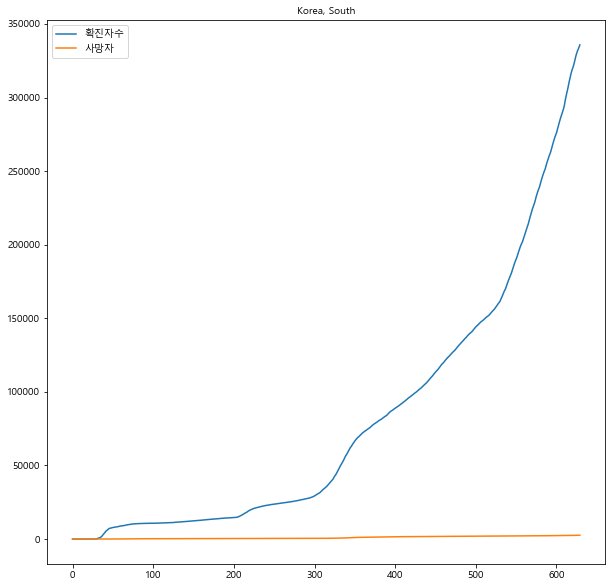

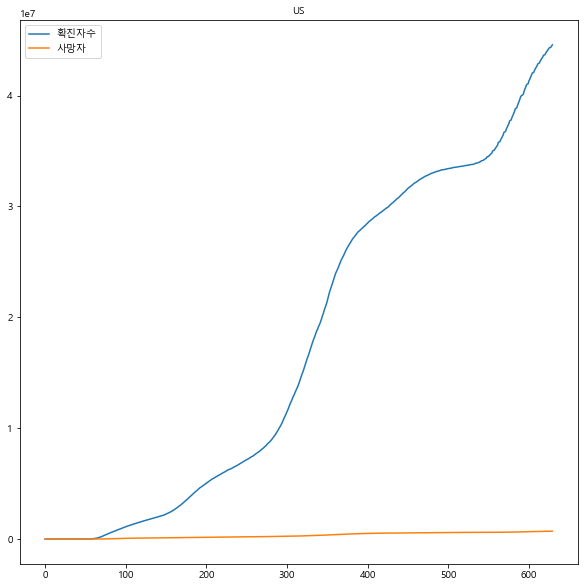

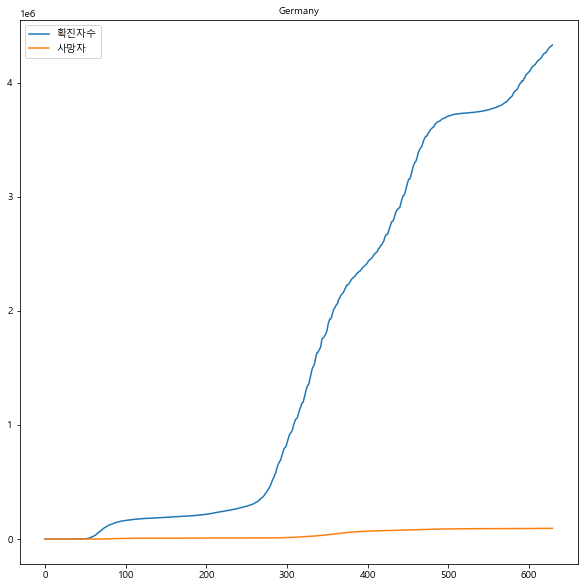

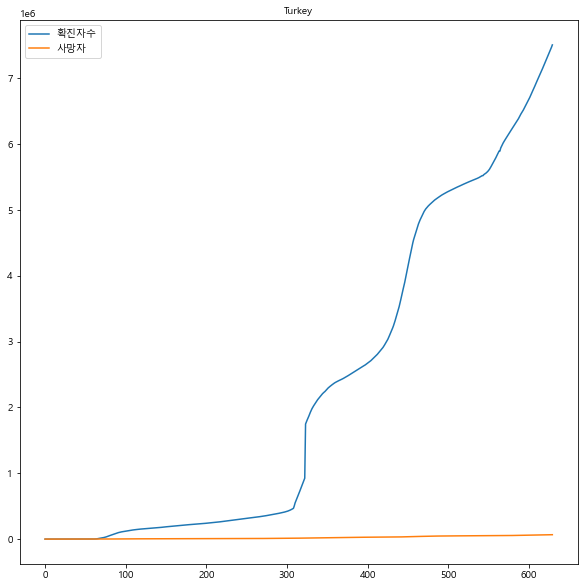

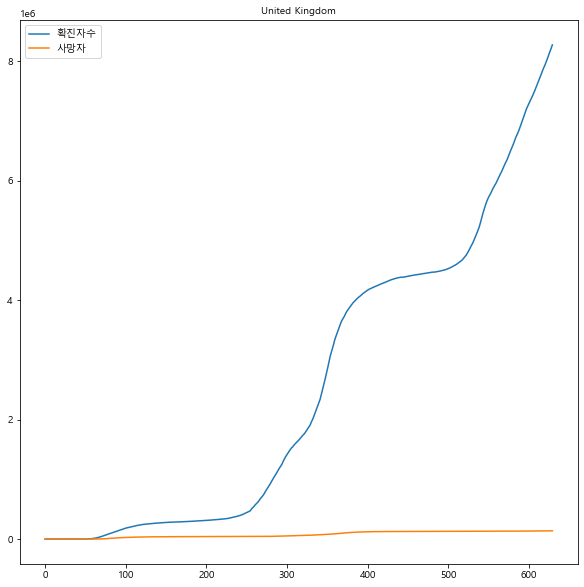

In [108]:
#label
#labels = df1.columns[3:]
for i in range(1,6):
        globals()['covid_{}'.format(i)] =  pd.DataFrame(data = df1[df1.columns[4:]].iloc[i-1])
        globals()['death_{}'.format(i)] =  pd.DataFrame(data = df2[df2.columns[4:]].iloc[i-1])
        globals()['plt_{}'.format(i)] = plt.figure(figsize=(10,10))
        globals()['plt_{}'.format(i)] = plt.title(select_Country[i-1],fontsize=10)
        globals()['days_{}'.format(i)] = list(range(0, len(globals()['covid_{}'.format(i)])))
        globals()['plt_{}'.format(i)] = plt.plot( globals()['days_{}'.format(i)], globals()['covid_{}'.format(i)], label = "확진자수")
        globals()['plt_{}'.format(i)] = plt.plot( globals()['days_{}'.format(i)], globals()['death_{}'.format(i)], label = "사망자")
        globals()['plt_{}'.format(i)] = plt.legend(loc = 'upper left')
        
        



In [111]:
covid_1.rename(columns={0:"data"}, inplace=True)
covid_2.rename(columns={1:"data"}, inplace=True)
covid_3.rename(columns={2:"data"}, inplace=True)
covid_4.rename(columns={3:"data"}, inplace=True)
covid_5.rename(columns={4:"data"}, inplace=True)

death_1.rename(columns={0:"data"}, inplace=True)
death_2.rename(columns={1:"data"}, inplace=True)
death_3.rename(columns={2:"data"}, inplace=True)
death_4.rename(columns={3:"data"}, inplace=True)
death_5.rename(columns={4:"data"}, inplace=True)

# 4번문제 인구수 비율
 - Kr : 51,269,185
 - US : 331,002,651
 - GM : 83,783,942
 - TK : 84,339,067
 - UK : 67,886,011

In [112]:
#확진자 인구수 추가
covid_1["pop"] = 51269185
covid_2["pop"] = 331002651
covid_3["pop"] = 83783942
covid_4["pop"] = 84339067
covid_5["pop"] = 67886011

#사망자 인구수 추가
death_1["pop"] = 51269185
death_2["pop"] = 331002651
death_3["pop"] = 83783942
death_4["pop"] = 84339067
death_5["pop"] = 67886011


covid_1["rate"] = covid_1["data"]/covid_1["pop"]*100
covid_2["rate"] = covid_2["data"]/covid_2["pop"]*100
covid_3["rate"] = covid_3["data"]/covid_3["pop"]*100
covid_4["rate"] = covid_4["data"]/covid_4["pop"]*100
covid_5["rate"] = covid_5["data"]/covid_5["pop"]*100

death_1["rate"] = death_1["data"]/death_1["pop"]*100
death_2["rate"] = death_2["data"]/death_2["pop"]*100
death_3["rate"] = death_3["data"]/death_3["pop"]*100
death_4["rate"] = death_4["data"]/death_4["pop"]*100
death_5["rate"] = death_5["data"]/death_5["pop"]*100


In [120]:
#데이터 확인
covid_1

,data,pop,rate
1/22/20,1,51269185,0.000002
1/23/20,1,51269185,0.000002
1/24/20,2,51269185,0.000004
1/25/20,2,51269185,0.000004
1/26/20,3,51269185,0.000006
...,...,...,...
10/8/21,329925,51269185,0.643515
10/9/21,331519,51269185,0.646624
10/10/21,332816,51269185,0.649154
10/11/21,334163,51269185,0.651781


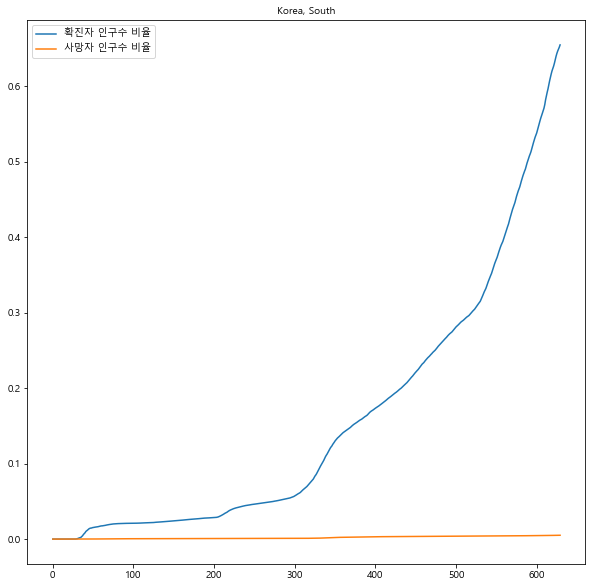

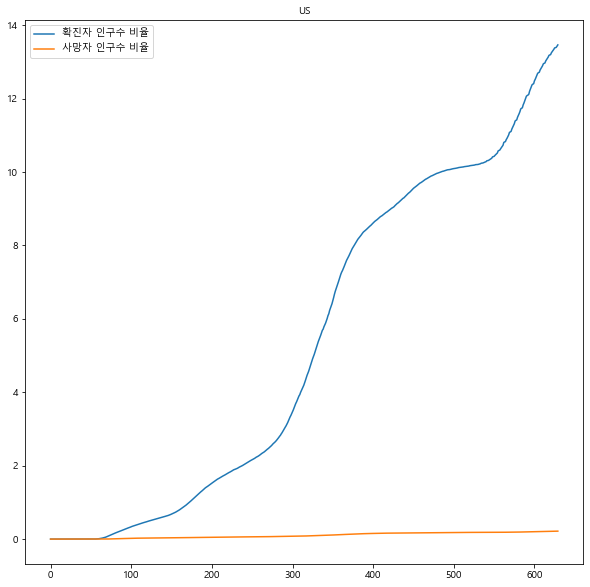

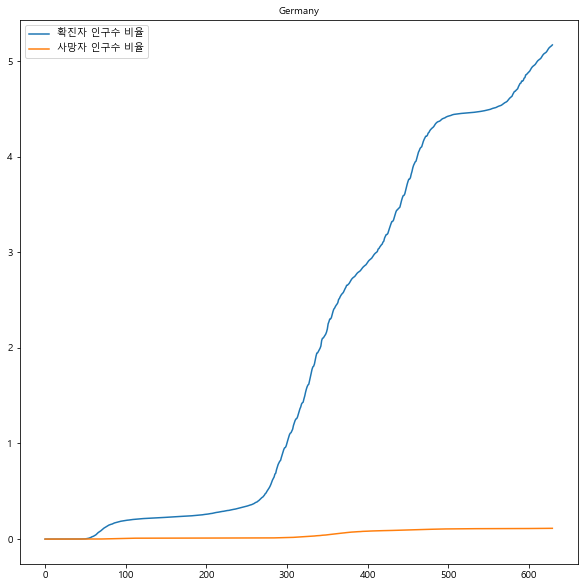

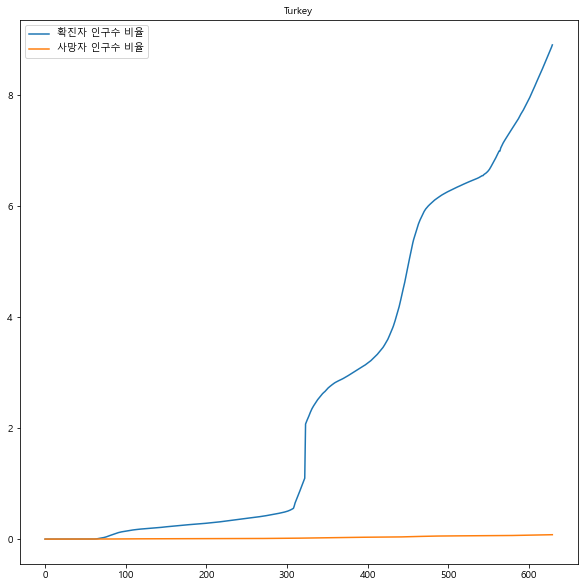

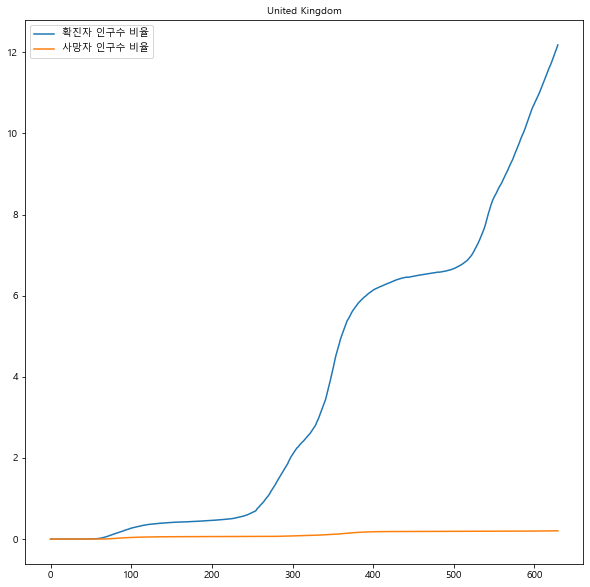

In [127]:
#한국의 비율
plt1=plt.figure(figsize=(10,10))
plt1=plt.title(select_Country[0],fontsize=10)
plt1=plt.plot( days_1 ,covid_1["rate"], label = "확진자 인구수 비율")
plt1=plt.plot( days_1 ,death_1["rate"], label = "사망자 인구수 비율")
plt1=plt.legend()
plt1;

#미국의 비율
plt2=plt.figure(figsize=(10,10))
plt2=plt.title(select_Country[1],fontsize=10)
plt2=plt.plot( days_2 ,covid_2["rate"], label = "확진자 인구수 비율")
plt2=plt.plot( days_2 ,death_2["rate"], label = "사망자 인구수 비율")
plt2=plt.legend()
plt2;

#독일의 비율
plt3=plt.figure(figsize=(10,10))
plt3=plt.title(select_Country[2],fontsize=10)
plt3=plt.plot( days_3 ,covid_3["rate"], label = "확진자 인구수 비율")
plt3=plt.plot( days_3 ,death_3["rate"], label = "사망자 인구수 비율")
plt3=plt.legend()
plt3;

#터키의 비율
plt4=plt.figure(figsize=(10,10))
plt4=plt.title(select_Country[3],fontsize=10)
plt4=plt.plot( days_4 ,covid_4["rate"], label = "확진자 인구수 비율")
plt4=plt.plot( days_4 ,death_4["rate"], label = "사망자 인구수 비율")
plt4=plt.legend()
plt4;

#영국 비율
plt5=plt.figure(figsize=(10,10))
plt5=plt.title(select_Country[4],fontsize=10)
plt5=plt.plot( days_5 ,covid_5["rate"], label = "확진자 인구수 비율")
plt5=plt.plot( days_5 ,death_5["rate"], label = "사망자 인구수 비율")
plt5=plt.legend()
plt5;


# 5번 문제 시계열 분석
 - from fbprophet import Prophet

In [158]:
#시계열 import 하기
from fbprophet import Prophet
df1

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/3/21,10/4/21,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
"Korea, South",1,1,2,2,3,4,4,4,4,11,...,319777,321352,323379,325804,327976,329925,331519,332816,334163,335742
US,1,1,2,2,5,5,5,6,6,8,...,43683048,43852255,43947489,44058827,44158910,44290052,44317553,44339747,44455949,44562257
Germany,0,0,0,0,0,1,4,4,4,5,...,4260494,4265001,4272764,4284400,4295876,4305634,4312528,4318437,4323346,4331274
Turkey,0,0,0,0,0,0,0,0,0,0,...,7238237,7267047,7296849,7327317,7357306,7387507,7416152,7444522,7475085,7508945
United Kingdom,0,0,0,0,0,0,0,0,0,2,...,7937810,7972312,8005502,8044424,8084322,8119442,8158935,8192589,8232327,8270182


In [168]:
#df2.set_index("Country/Region", inplace =True)
df2

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/3/21,10/4/21,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
"Korea, South",0,0,0,0,0,0,0,0,0,0,...,2513,2524,2536,2544,2554,2560,2575,2583,2594,2605
US,0,0,0,0,0,0,0,0,0,0,...,701704,703819,705553,708110,710502,712339,712618,712873,714055,716471
Germany,0,0,0,0,0,0,0,0,0,0,...,93798,93887,93963,94031,94117,94182,94206,94213,94308,94393
Turkey,0,0,0,0,0,0,0,0,0,0,...,64661,64909,65137,65373,65590,65778,65984,66180,66368,66605
United Kingdom,0,0,0,0,0,0,0,0,0,0,...,137338,137378,137544,137694,137818,137945,138101,138139,138167,138351


In [169]:
#데이터 만들기

#감염자 데이터
covidDf1 = pd.DataFrame({"ds":df1.columns,"y":df1.loc["Korea, South"]})
covidDf1

covidDf2 = pd.DataFrame({"ds":df1.columns,"y":df1.loc["US"]})
covidDf2

covidDf3 = pd.DataFrame({"ds":df1.columns,"y":df1.loc["Germany"]})
covidDf3

covidDf4 = pd.DataFrame({"ds":df1.columns,"y":df1.loc["Turkey"]})
covidDf4

covidDf5 = pd.DataFrame({"ds":df1.columns,"y":df1.loc["United Kingdom"]})
covidDf5

#사망자 데이터
deathDf1 = pd.DataFrame({"ds":df2.columns,"y":df2.loc["Korea, South"]})
deathDf1

deathDf2 = pd.DataFrame({"ds":df2.columns,"y":df2.loc["US"]})
deathDf2

deathDf3 = pd.DataFrame({"ds":df2.columns,"y":df2.loc["Germany"]})
deathDf3

deathDf4 = pd.DataFrame({"ds":df2.columns,"y":df2.loc["Turkey"]})
deathDf4

deathDf5 = pd.DataFrame({"ds":df2.columns,"y":df2.loc["United Kingdom"]})
deathDf5

,ds,y
1/22/20,1/22/20,0
1/23/20,1/23/20,0
1/24/20,1/24/20,0
1/25/20,1/25/20,0
1/26/20,1/26/20,0
...,...,...
10/8/21,10/8/21,137945
10/9/21,10/9/21,138101
10/10/21,10/10/21,138139
10/11/21,10/11/21,138167


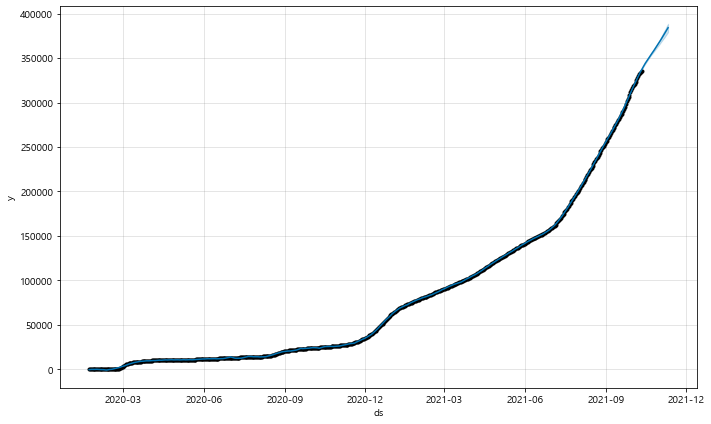

In [172]:
#한국 예측 그래프(30일 기간)
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(covidDf1) 
future = m.make_future_dataframe(periods=30) # 30일 데이터 예측
forecast = m.predict(future)
forecast
m.plot(forecast);

C:\Users\wjm\anaconda3\envs\ds_study\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wjm\anaconda3\envs\ds_study\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


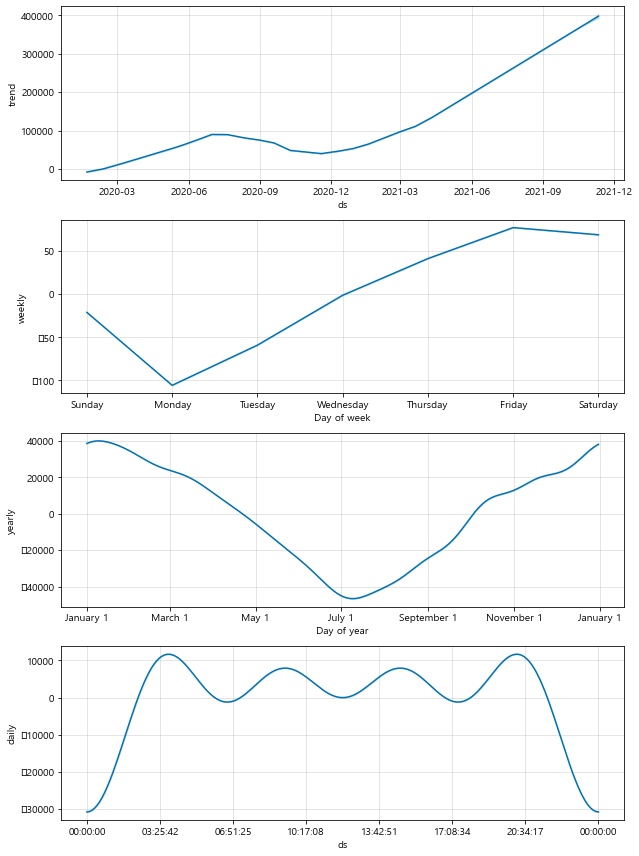

In [171]:
#한국 예측데이터
m.plot_components(forecast);

한국:트랜드는 우상향 추세이며 점점 더 높아지는걸 볼수 있다
     주별로 볼 경우에는 출근을 시작하는 월요일부터 차츰 높아지기 시작하여 불금,주말에 특히 많이 발생 하는걸 알 수 있다.
     월별은 날씨가 더워질수록 발생률이 적어지고 날씨가 추워질수록 많이 발생하는것을 알 수 있다.

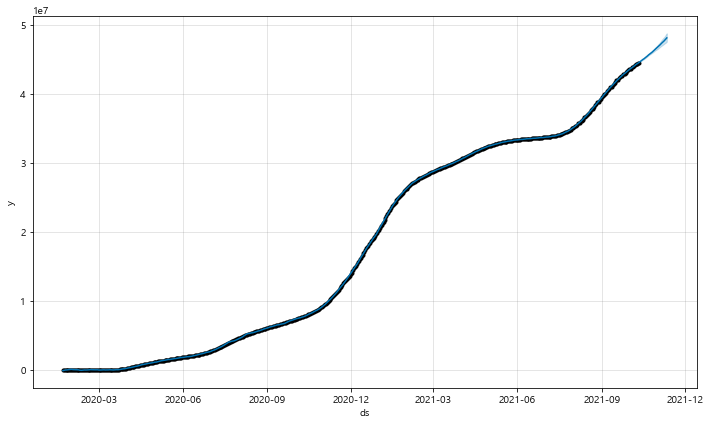

In [173]:
#미국 예측 그래프(30일)
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(covidDf2) 
future = m.make_future_dataframe(periods=30) # 30일 데이터 예측
forecast = m.predict(future)
forecast
m.plot(forecast);

C:\Users\wjm\anaconda3\envs\ds_study\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wjm\anaconda3\envs\ds_study\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


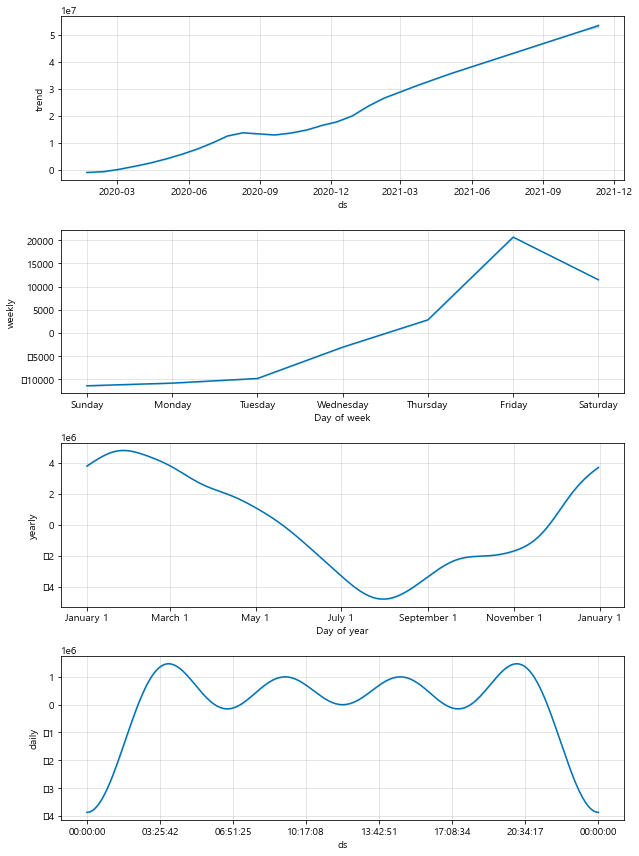

In [174]:
#미국 예측데이터
m.plot_components(forecast);

미국 : 미국의 트랜드 경우 처음에는 주춤하는듯 하였으나 겨울을 기점으로 곧은 직선으로 빠르게 발생한걸 알 수 있다.
       미국의 주별은 수요일부터 토요일까지 많이 발생하는걸 알 수 있다.
       미국도 한국과 같이 날씨가 따뜻할때는 발생률이 적으나 추워지기 시작하면서 많이 발생하는걸 볼 수 있다. 

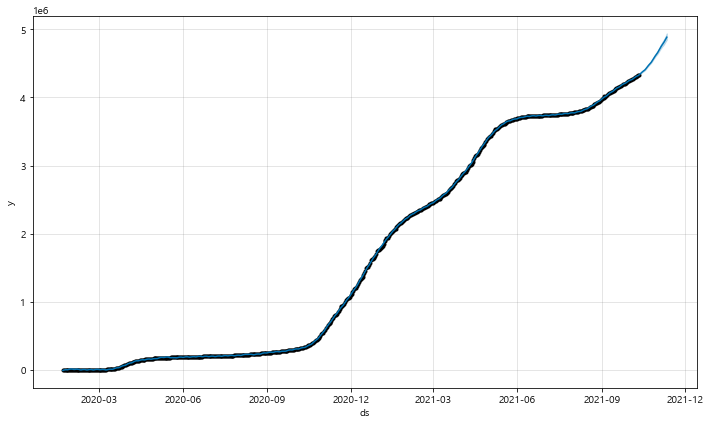

In [175]:
#독일 예측 그래프(30일)
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(covidDf3) 
future = m.make_future_dataframe(periods=30) # 30일 데이터 예측
forecast = m.predict(future)
forecast
m.plot(forecast);

C:\Users\wjm\anaconda3\envs\ds_study\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wjm\anaconda3\envs\ds_study\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


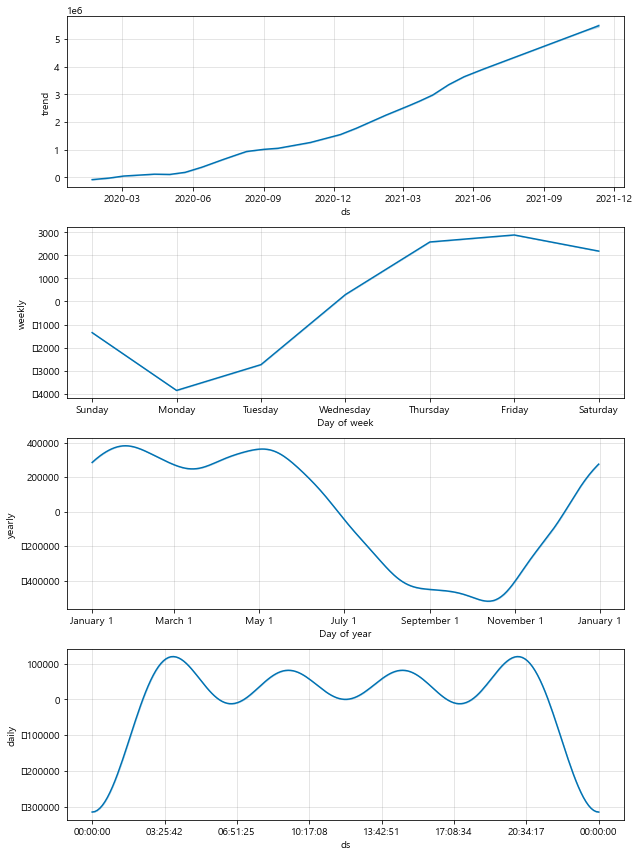

In [176]:
#독일 예측데이터
m.plot_components(forecast);

독일: 트랜드는 미국과 비슷하게 처음에는 주춤 하였으나 급격히 증가하는 모습을 보여주고 있다.
     주별의 경우 월요일을 빼고 계속적으로 증가하다가 일요일에 월요일 출근으로 인한 휴식을 취함으로써 조금 줄어드는 모습을 볼 수 있다.
     월별의 경우 9월부터 11월에만 적고 그 이외의 달은 다 높은 모습을 보여준다

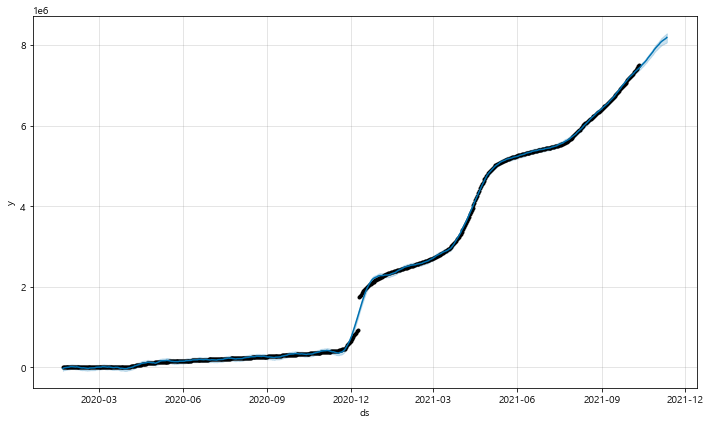

In [177]:
#터키 예측 그래프(30일)
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(covidDf4) 
future = m.make_future_dataframe(periods=30) # 30일 데이터 예측
forecast = m.predict(future)
forecast
m.plot(forecast);

C:\Users\wjm\anaconda3\envs\ds_study\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wjm\anaconda3\envs\ds_study\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


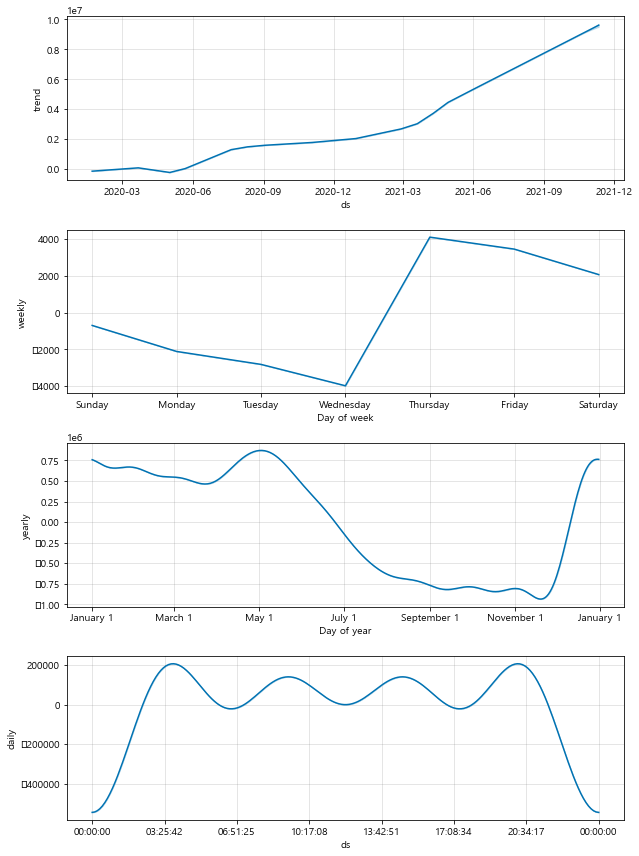

In [178]:
#터키 예측데이터
m.plot_components(forecast);

터키: 트랜드의 경우 다른나라와 비슷하게 처음에는 완마하고 점점 더 증가한다.
      주별의 경우 일요일부터 수요일까지 줄어드는 모습이고 목요일을 기점으로 많은 상승과 발생률이 많아진다.
      월별의 경우 7월부터 11월까지 발생률이 적으며 그 이외의 월에는 많이 발생하는걸 볼 수 있다.

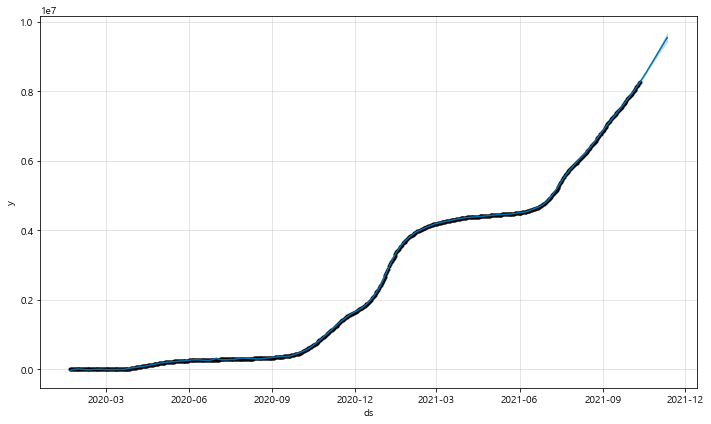

In [179]:
#영국 예측 그래프(30일)
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(covidDf5) 
future = m.make_future_dataframe(periods=30) # 30일 데이터 예측
forecast = m.predict(future)
forecast
m.plot(forecast);

C:\Users\wjm\anaconda3\envs\ds_study\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wjm\anaconda3\envs\ds_study\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


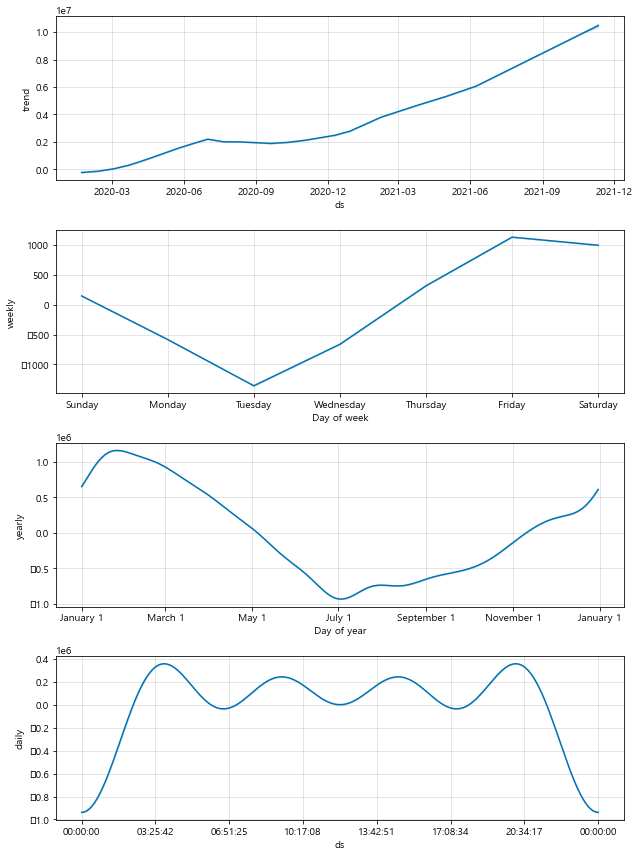

In [180]:
#영국 예측데이터
m.plot_components(forecast);

영국 :  트랜드는 처음에 증가를 하다가 조금 줄어드는 모습이 보이다가 다시 급격하게 증가하는 모습을 볼 수 있다.
        주별은 일요일부터 화요일에는 점점 줄어드는 모습을 보이다가 수요일부터 다시 급격하게 증가하는 모습을 볼 수 있다.
        월별은 7월부터 차츰 증가하다가 3월을 기점으로 다시 줄어드는 모습을 보여준다.

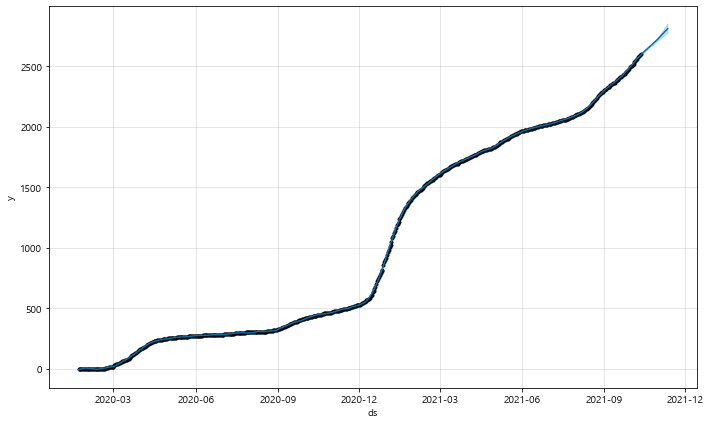

In [181]:
#한국 사망률 예측 그래프(30일)
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(deathDf1) 
future = m.make_future_dataframe(periods=30) # 30일 데이터 예측
forecast = m.predict(future)
forecast
m.plot(forecast);

C:\Users\wjm\anaconda3\envs\ds_study\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wjm\anaconda3\envs\ds_study\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


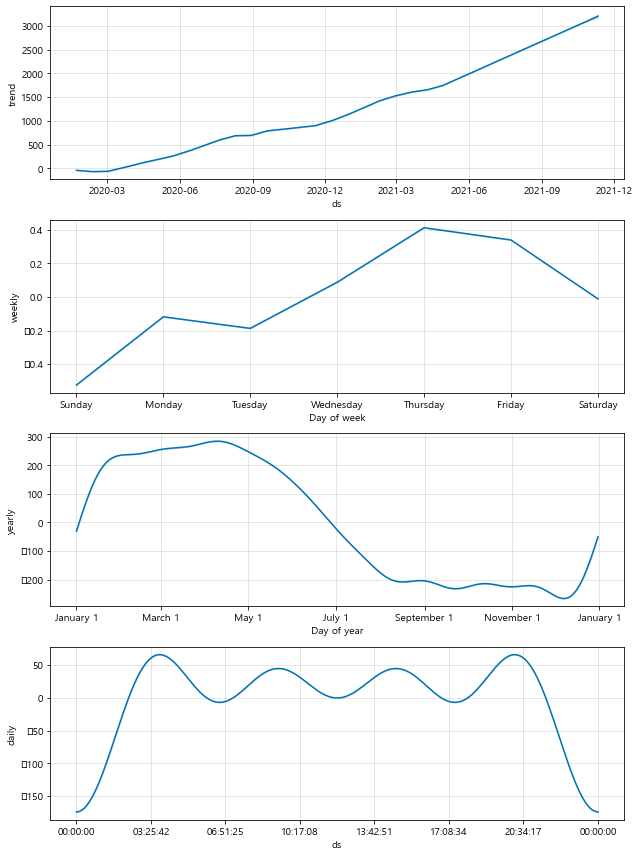

In [183]:
#한국 사망률 예측데이터
m.plot_components(forecast);

# 한국 사망률
 한국의 사망률
    트랜드는 쭉 증가하는 모습을 보여준다.
    주별은 주말이 끝나는 기점으로 사망자가 증가하는걸 볼 수 있다.
    월별은 날씨가 따뜻할때는 발생이 적으므로 사망률도 같이 내려갔다가 다시 추워지기 시작하면서 증가한ㄷ.

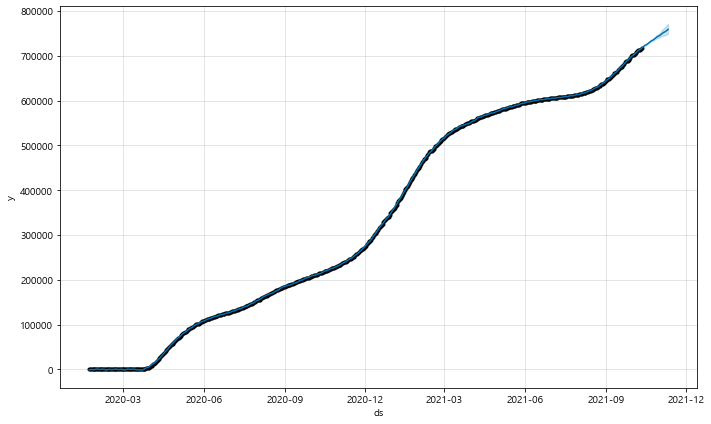

In [184]:
#미국 사망률 예측 그래프(30일)
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(deathDf2) 
future = m.make_future_dataframe(periods=30) # 30일 데이터 예측
forecast = m.predict(future)
forecast
m.plot(forecast);

C:\Users\wjm\anaconda3\envs\ds_study\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wjm\anaconda3\envs\ds_study\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


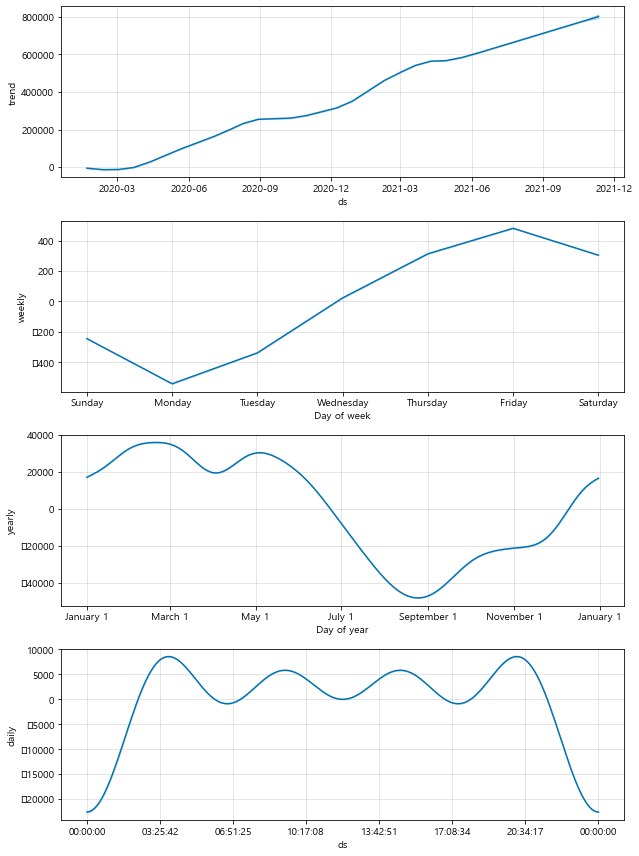

In [185]:
#미국 사망률 예측데이터
m.plot_components(forecast);

# 미국의 사망률
 미국:
 트랜드는 점점 증가하고 있습니다.
 주별은 월요일부터 점점 증가하는 추세가 보이다가 일요일에 많이 줄어들기 시작하는 모습을 보여준다.
 월별은 날씨가 발생률과 비슷하게 날씨가 따뜻할때 줄어들었다가 날씨가 추워지면서 증가하는 모습을 보여준다.

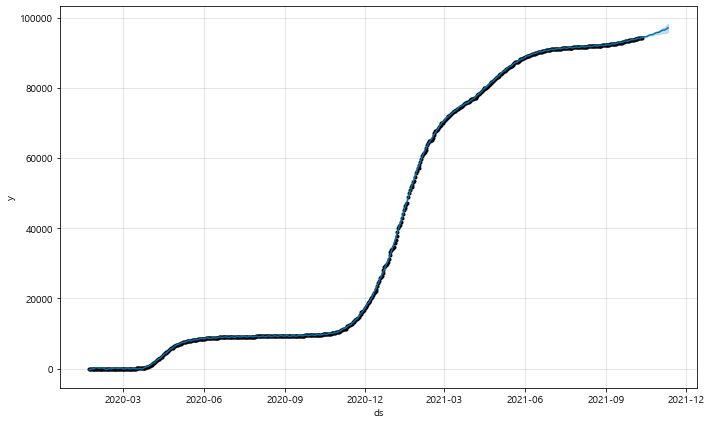

In [186]:
#독일 사망률 예측 그래프(30일)
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(deathDf3) 
future = m.make_future_dataframe(periods=30) # 30일 데이터 예측
forecast = m.predict(future)
forecast
m.plot(forecast);

C:\Users\wjm\anaconda3\envs\ds_study\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wjm\anaconda3\envs\ds_study\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


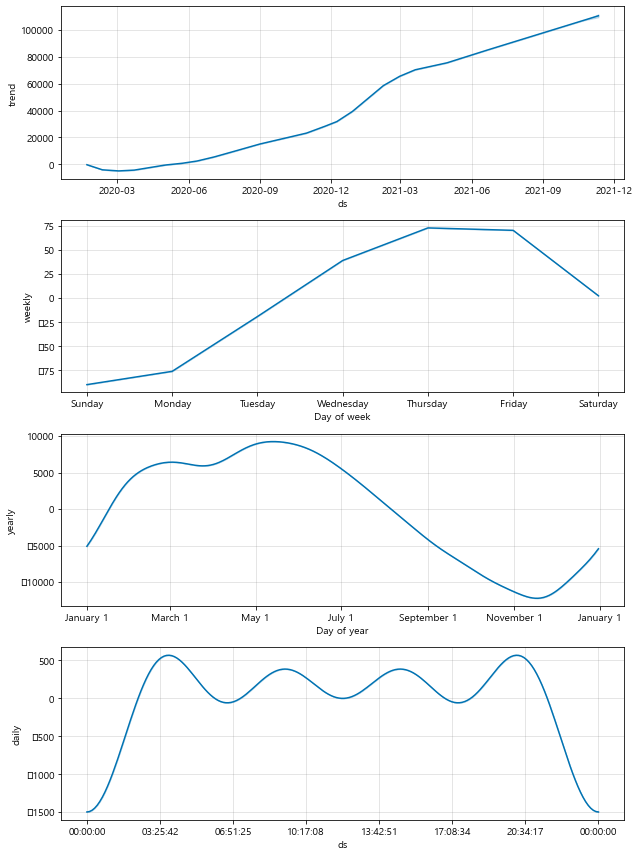

In [187]:
#독일 사망률 예측데이터
m.plot_components(forecast);

# 독일의 사망률 예측
독일:
트랜드는 처음에는 완만했다가 21년이 시작되면서 많이 증가하고있다.
주별은 일요일부터 쭈욱 증가하다가 금요일부터 점점 적어지고 있다.
월별은 발생률과 비슷하게 11월달만 적게 나타난다.

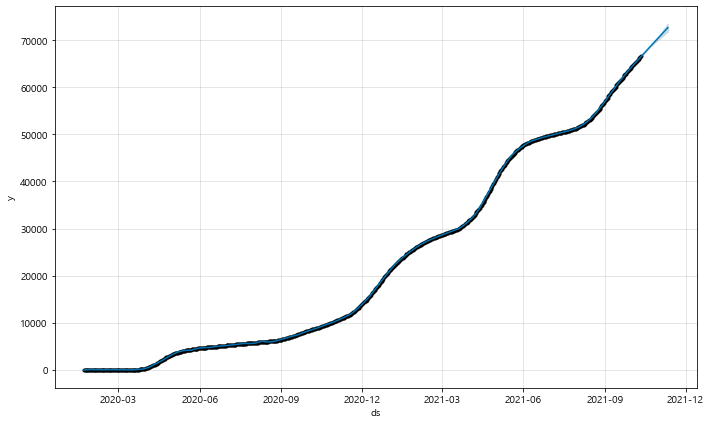

In [190]:
#터키 사망률 예측 그래프(30일)
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(deathDf4) 
future = m.make_future_dataframe(periods=30) # 30일 데이터 예측
forecast = m.predict(future)
forecast
m.plot(forecast);

C:\Users\wjm\anaconda3\envs\ds_study\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wjm\anaconda3\envs\ds_study\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


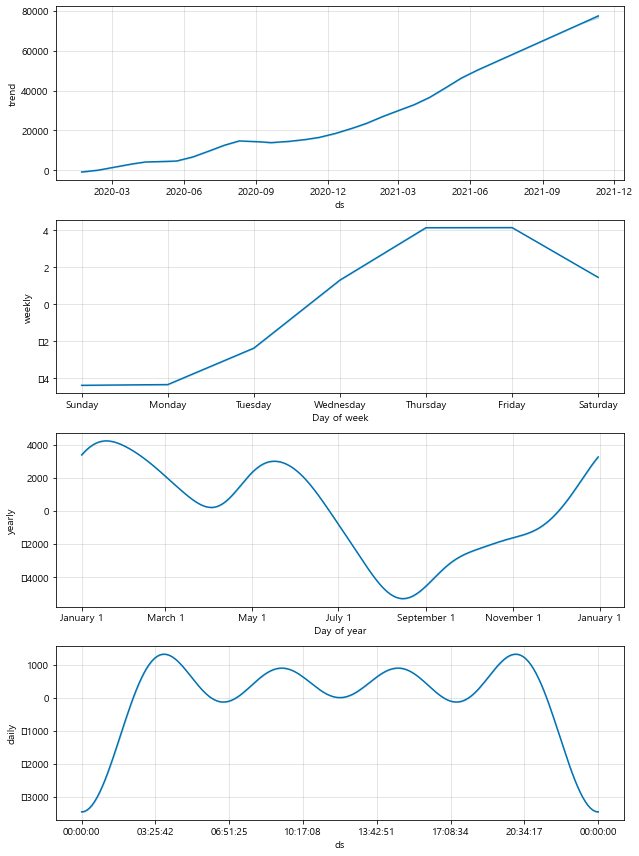

In [191]:
#터키 사망률 예측데이터
m.plot_components(forecast);

# 터키의 사망률 예측
터키
트랜드는 점점 증가하고 있고
주별은 월요일을 시작으로 점점 증가하다가 목, 금이 최고치를 찍는 모습을 보여준다.
월별은 11월을 제외하고 증가를 하다가 중간중간 줄어드는 모습으로 곡선의 모양을 하고 있다. 

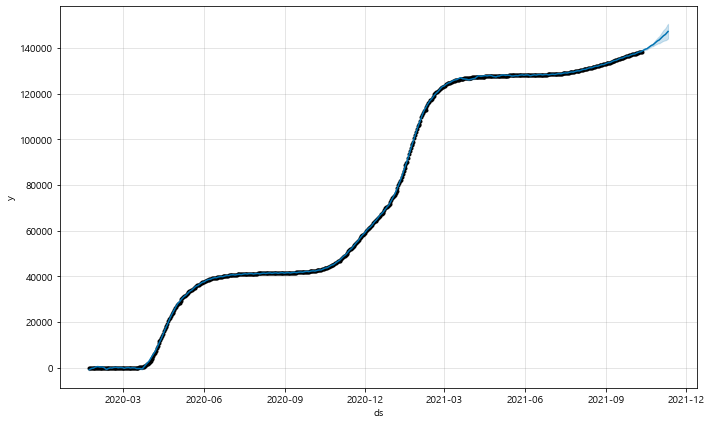

In [192]:
#영국 사망률 예측 그래프(30일)
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(deathDf5) 
future = m.make_future_dataframe(periods=30) # 30일 데이터 예측
forecast = m.predict(future)
forecast
m.plot(forecast);

C:\Users\wjm\anaconda3\envs\ds_study\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wjm\anaconda3\envs\ds_study\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


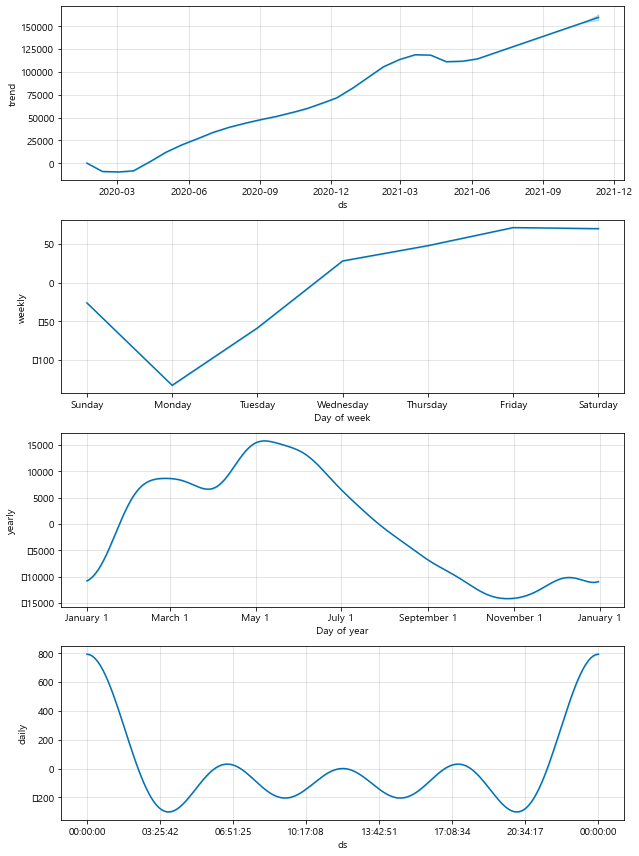

In [193]:
#영국 사망률 예측데이터
m.plot_components(forecast);

# 영국의 사망률
영국
21년 6월에 잠시 주춤하는 모습을 보여주고 다른 기간에는 계속 증가한다.
주별은 월요일에는 최저점을 보여주고 토요일까지 증갛다가 일요일에 조금 줄어드는 모습을 보여준다.
월별은 7월전은 증가하하다가 그 이후는 줄어드는 모습이다.

# 6번 문제
 ## 총정리
 위의 그래프와 예측 데이터를 봤을때 발생한지 1년쯤에는 그리 높은 수준의 발생률과 사망률이 아니였으나 코로나의 감염이 공기중으로
 전파됨으로 날이 지날수록 급격하게 증가하는 모습을 위의 5개 나라에서 볼 수 있으며 한국과 같은 날씨인 미국의 경우로 보았을때 날씨가
 따뜻할때는 병균이 잘 생존하기 힘드므로 발생률과 사망률이 줄어들고 추워지면서 많이 발생률과 사마률이 증가하고 있는 모습을 보여준다.
 한국의 경우에는 초기방역을 잘 하였으나, 사람들이 그거에 안심하고 완화된 거리두기로 인해 다시 재발생이 많이 되었고
 현재 빠른 백신 접종을 진행하고 있으므로 다시 좋아질 것이라고 생각한다.

# 7번 문제
- 암으로 인한 사망률 혹은 생존률 데이터

In [ ]:
cancer_survival_rate = pd.read_csv("../data/cancer_survival.csv")
cancer_survival_rate.tail()

cancer_survival_rate["country"].unique()

cancer_survival_rate = cancer_survival_rate[(cancer_survival_rate["country"] == 'United Kingdom')|\
                    (cancer_survival_rate["country"] == 'South Korea') |\
                    (cancer_survival_rate["country"] == 'Italy') |\
                    (cancer_survival_rate["country"] == 'Germany') |\
                    (cancer_survival_rate["country"] == 'Australia')]

cancer_survival_rate

cancer_survival_rate.set_index("country", inplace=True)

cancer_survival_rate.rename(columns={"breastRate":"유방암", "stomachRate":"위암", "lungRate":"폐암", "prostateRate":"전립샘암"}, inplace=True)
cancer_survival_rate

import seaborn as sns
def bar_graph(df, fig_width, fig_height, between_bar_padding, within_bar_padding, title):
    num_sub_category = len(df.index) # 서브 카테고리 갯수
    sub_category = df.index
    fig = plt.figure(figsize=(fig_width, fig_height))
    ax = fig.add_subplot()
    colors = sns.color_palette("hls", num_sub_category) # 막대기 색상지정
    tick_label = df.columns # 메인 카테고리 라벨 생성
    tick_number = len(tick_label) # 메인 카테고리 눈금 갯수
    tick_coord = np.arange(len(tick_label)) # 메인카테고리 안에서 첫번째 서브 카테고리가 그려지는 좌표
    width = 1/num_sub_category*between_bar_padding # 막대기 폭 지정
    config_tick = dict()
    config_tick['ticks'] = [t + width*(num_sub_category-1)/2 for t in tick_coord] # 메인 카테고리 라벨 x좌표
    config_tick['labels'] = tick_label
    plt.xticks(**config_tick) ## x축 눈금 라벨 생성
    for i in range(num_sub_category):
        ax.bar(tick_coord+width*i, df.loc[sub_category[i]], \
               width*within_bar_padding, label=sub_category[i], \
               color=colors[i]) ## 수직 바 차트 생성
    plt.legend() ## 범례 생성
    plt.title(title)
    plt.show()